ModuleNotFoundError: No module named 'mplhelp'

In [239]:
import numpy as np
import csv



import matplotlib.pyplot as plt

import pandas as pd

In [241]:
cellstats = pd.read_csv('narrow-cellstats.csv')

In [243]:
positions = pd.read_csv('lookuptable.csv')

In [245]:
positions.head()

CellID  Layer  U  V        X        Y        Z
Ecal(0 0 0[0    0])      0  0  0 -81.8697  50.0479  247.932
         1[1    0])      0  1  0 -81.8697  41.7066  247.932
         2[2    0])      0  2  0 -81.8697  33.3653  247.932
         3[3    0])      0  3  0 -81.8697  25.0240  247.932
         4[4    0])      0  4  0 -81.8697  16.6826  247.932

In [247]:
cellstats.head()

,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF
0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,3,7.487457,3.43952,6.131416e-09,4.889207,0.407489,1.007629,1.494034,0.827698,4.0
4,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
positions.sort_values(["Layer", "U", "V"],axis=0,ascending=[True, True, True], inplace=True)

In [251]:
positions.head()

CellID  Layer  U  V        X        Y        Z
Ecal(0 0 0[0     0])      0  0  0 -81.8697  50.0479  247.932
         13[0    1])      0  0  1 -74.6459  54.2186  247.932
         27[0    2])      0  0  2 -67.4221  58.3892  247.932
         42[0    3])      0  0  3 -60.1983  62.5599  247.932
         58[0    4])      0  0  4 -52.9745  66.7306  247.932

In [277]:
beam_x = 0
beam_y = 0
positions['cos_angle'] = (
    positions.Z/
    np.sqrt((positions.X-beam_x)**2+(positions.Y-beam_y)**2+positions.Z**2)
)
positions['entry_angle_rad'] = np.arccos(cos_angle)
positions['entry_angle_deg'] = np.degrees(entry_angle_rad)

In [281]:
positions

CellID  Layer   U   V        X        Y        Z  cos_angle  \
Ecal(0  0 0[0       0])      0   0   0 -81.8697  50.0479  247.932   0.932591   
          13[0      1])      0   0   1 -74.6459  54.2186  247.932   0.937216   
          27[0      2])      0   0   2 -67.4221  58.3892  247.932   0.940965   
          42[0      3])      0   0   3 -60.1983  62.5599  247.932   0.943807   
          58[0      4])      0   0   4 -52.9745  66.7306  247.932   0.945716   
...                 ...    ...  ..  ..      ...      ...      ...        ...   
Ecal(33 0 377[23   19])     33  23  19  60.1983 -62.5599  749.106   0.993351   
          392[23   20])     33  23  20  67.4221 -58.3892  749.106   0.992986   
          406[23   21])     33  23  21  74.6459 -54.2186  749.106   0.992501   
          419[23   22])     33  23  22  81.8697 -50.0479  749.106   0.991896   
          431[23   23])     33  23  23  89.0935 -45.8773  749.106   0.991170   

                  entry_angle_rad  entry_angle_deg  
Ecal(0  0 0[0            0.369270        21.157588  
          13[0           0.356237        20.410883  
          27[0           0.345325        19.785680  
          42[0           0.336829        19.298902  
          58[0           0.331005        18.965185  
...                           ...              ...  
Ecal(33 0 377[23         0.115382         6.610921  
          392[23         0.118505         6.789860  
          406[23         0.122541         7.021100  
          419[23         0.127399         7.299452  
          431[23         0.132985         7.619507  

[14688 rows x 10 columns]

In [285]:
cellstats["Angle_Rad"] = list(positions.entry_angle_rad)
cellstats["Angle_Deg"] = list(positions.entry_angle_deg)
cellstats["Cos_Angle"] = list(positions.cos_angle)

In [287]:
cellstats.describe()

,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF,Angle_Rad,Angle_Deg,Cos_Angle
count,14688.000000,14688.000000,14688.000000,13706.000000,1.370600e+04,1.370600e+04,13706.000000,1.370600e+04,1.370600e+04,1.370600e+04,13706.000000,13706.000000,14688.000000,14688.000000,14688.000000
mean,16.500000,11.666667,11.333333,848.918422,1.848915e+03,1.562095e-01,0.777889,5.823160e+02,1.461036e+05,9.484301e+01,0.472455,20.112578,0.138375,7.928293,0.988109
std,9.811042,6.320377,6.320377,6583.076008,3.037394e+04,3.256471e-01,1.506386,4.437017e+04,1.177729e+07,8.013965e+02,0.361927,17.113296,0.068741,3.938557,0.011393
min,0.000000,0.000000,0.000000,5.535730,1.065719e-03,2.775558e-16,0.000148,3.466807e-04,5.352287e-05,5.608859e-11,0.000000,0.000000,0.006429,0.368339,0.930481
25%,8.000000,7.000000,6.000000,13.639784,5.321694e+00,1.253276e-01,0.003947,1.551984e-02,2.350318e-03,4.874529e+00,0.079602,8.000000,0.089690,5.138833,0.984099
50%,16.500000,12.000000,11.000000,52.065276,1.430401e+01,1.372997e-01,0.014139,5.334461e-02,9.948155e-03,1.295582e+01,0.491905,15.000000,0.127412,7.300178,0.991894
75%,25.000000,17.000000,16.000000,236.868567,3.956723e+01,1.653638e-01,0.351448,1.519893e-01,1.306756e-01,3.337330e+01,0.817775,27.000000,0.178567,10.231142,0.995981
max,33.000000,23.000000,23.000000,517467.391607,2.702253e+06,5.000000e+00,4.999987,5.057978e+06,1.350465e+09,2.921828e+04,1.000000,97.000000,0.375072,21.490031,0.999979


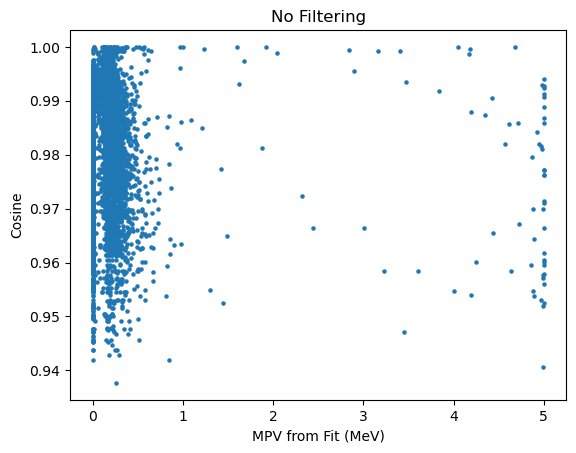

In [299]:
plt.scatter(cellstats.MPV,cellstats.Cos_Angle, s= 5)
plt.ylabel("Cosine")
plt.xlabel("MPV from Fit (MeV)")
plt.title("No Filtering")
plt.show()

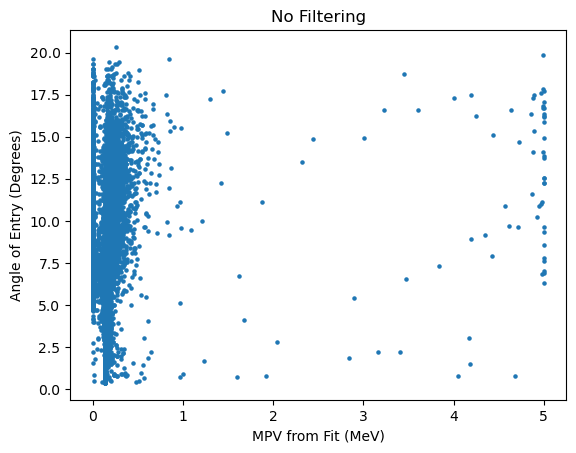

In [301]:
plt.scatter(cellstats.MPV,cellstats.Angle_Deg, s= 5)
plt.ylabel("Angle of Entry (Degrees)")
plt.xlabel("MPV from Fit (MeV)")
plt.title("No Filtering")
plt.show()

In [303]:
### what's my validity condition? NDF greater than 5? what about chi?
mpvratio= abs(cellstats.MPV_Error/cellstats.MPV) ##mpvratio smaller than 5%


In [305]:
valid = cellstats[(cellstats.NDF>5) &(mpvratio<0.05)]

In [307]:
valid.describe()

,Layer,U,V,Constant,Constant_Error,MPV,MPV_Error,Sigma,Sigma_Error,Chi2,P,NDF,Angle_Rad,Angle_Deg,Cos_Angle
count,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000,5225.000000
mean,19.489569,11.427177,10.836172,1254.392197,157.759064,0.143752,0.003330,0.023059,0.002192,139.722918,0.249370,30.097225,0.078913,4.521394,0.996176
std,9.670843,3.939059,4.619764,7720.373183,4541.322273,0.024269,0.001874,0.019482,0.001646,593.304171,0.289931,20.257146,0.037846,2.168397,0.004236
min,0.000000,1.000000,0.000000,52.199215,12.369700,0.118815,0.000148,0.000356,0.000054,1.593706,0.000000,6.000000,0.006429,0.368339,0.949085
25%,12.000000,8.000000,7.000000,165.033580,28.726314,0.133247,0.001816,0.013549,0.001000,14.223673,0.000098,14.000000,0.054512,3.123335,0.995275
50%,21.000000,11.000000,11.000000,333.386694,44.813898,0.136241,0.003075,0.015030,0.001794,32.784403,0.106643,25.000000,0.076966,4.409811,0.997040
75%,28.000000,14.000000,14.000000,948.279925,73.434905,0.146015,0.004622,0.020652,0.002921,82.836040,0.477962,41.000000,0.097252,5.572115,0.998515
max,33.000000,22.000000,22.000000,517467.391607,297787.197444,0.994967,0.009570,0.485327,0.016706,13306.158244,0.990160,97.000000,0.320478,18.362026,0.999979


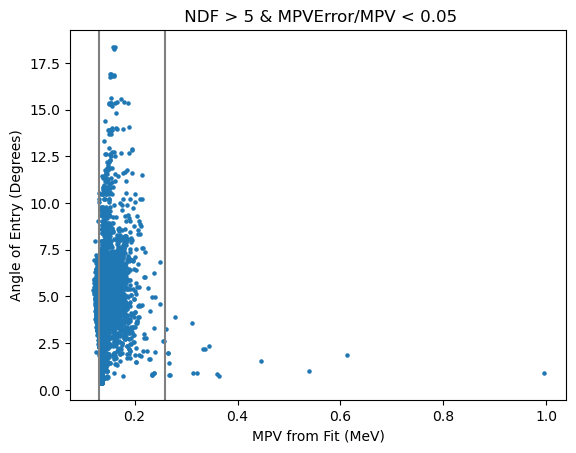

In [309]:
### All Layers ## with validity
plt.scatter(valid.MPV,valid.Angle_Deg, s = 5)
plt.ylabel("Angle of Entry (Degrees)")
plt.xlabel("MPV from Fit (MeV)")
plt.title (" NDF > 5 & MPVError/MPV < 0.05")
plt.axvline(0.13, color='gray')
plt.axvline(0.26, color='gray')
plt.show()

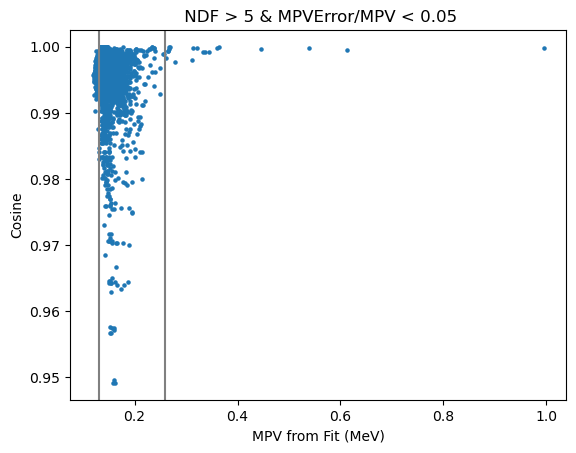

In [315]:
### All Layers ## with validity
plt.scatter(valid.MPV,valid.Cos_Angle, s = 5)
plt.ylabel("Cosine")
plt.xlabel("MPV from Fit (MeV)")
plt.title (" NDF > 5 & MPVError/MPV < 0.05")
plt.axvline(0.13, color='gray')
plt.axvline(0.26, color='gray')
plt.show()

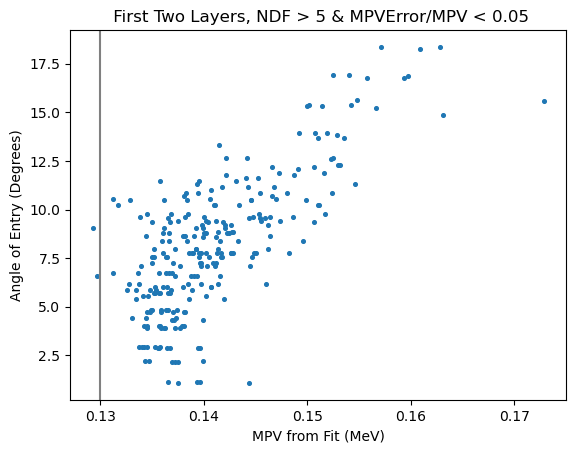

In [311]:
### First Two Layers ## with validity
picked = valid[(valid.Layer < 2)]
plt.scatter(picked.MPV,picked.Angle_Deg, s= 7)
plt.ylabel("Angle of Entry (Degrees)")
plt.xlabel("MPV from Fit (MeV)")
plt.title (" First Two Layers, NDF > 5 & MPVError/MPV < 0.05")
plt.axvline(0.13, color='gray')
plt.show()

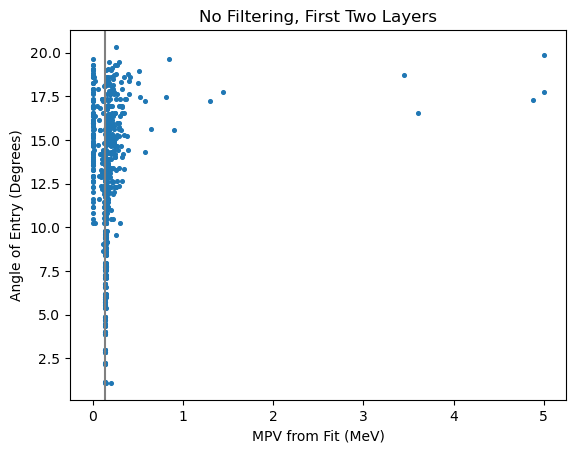

In [313]:
first_layers = cellstats[(cellstats.Layer < 2)]
plt.scatter(first_layers.MPV,first_layers.Angle_Deg, s =7)
plt.ylabel("Angle of Entry (Degrees)")
plt.xlabel("MPV from Fit (MeV)")
plt.title("No Filtering, First Two Layers")
plt.axvline(0.13, color='gray')
plt.show()

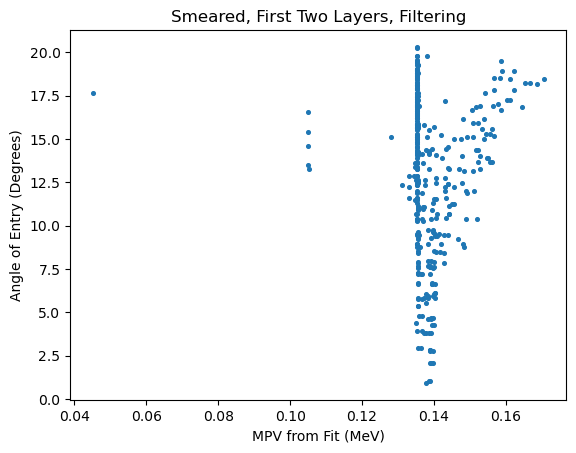

In [198]:
##Olde
smear = pd.read_csv('cellstats.csv')
smear["Angle"] = entry_angle

smear_mpvratio= abs(smear.MPV_Error/smear.MPV)
valid_smear = smear[(smear.NDF>5) & (smear_mpvratio<0.05) & (smear.Layer <2) ]
plt.scatter(valid_smear.MPV,valid_smear.Angle, s=7)
plt.ylabel("Angle of Entry (Degrees)")
plt.xlabel("MPV from Fit (MeV)")
plt.title("Smeared, First Two Layers, Filtering")
plt.show()